In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [5]:
import pandas as pd
import numpy as np
import numpy.random as npr
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import scipy.stats as scs
import scipy.optimize as sco
import scipy.interpolate as spi
import statsmodels.api as sm
from itertools import product
import pymc as pm
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
import yfinance as yf
import statsmodels.api as sm
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
raw = pd.read_csv('tr_eikon_eod_data.csv',
                 index_col = 0, parse_dates = True)
raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2216 entries, 2010-01-01 to 2018-06-29
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2138 non-null   float64
 1   MSFT.O  2138 non-null   float64
 2   INTC.O  2138 non-null   float64
 3   AMZN.O  2138 non-null   float64
 4   GS.N    2138 non-null   float64
 5   SPY     2138 non-null   float64
 6   .SPX    2138 non-null   float64
 7   .VIX    2138 non-null   float64
 8   EUR=    2216 non-null   float64
 9   XAU=    2211 non-null   float64
 10  GDX     2138 non-null   float64
 11  GLD     2138 non-null   float64
dtypes: float64(12)
memory usage: 225.1 KB


In [7]:
vol = pd.DataFrame()
raw1 = yf.download(['AAPL', 'MSFT', 'INTC', 'AMZN', 'GS'], start = '2010-01-01', end= '2018-06-30')
vol['AAPL.O'] = raw1['Volume']['AAPL']
vol['MSFT.O'] = raw1['Volume']['MSFT']
vol['INTC.O'] = raw1['Volume']['INTC']
vol['AMZN.O'] = raw1['Volume']['AMZN']
vol['GS.N'] = raw1['Volume']['GS']
vol

[*********************100%%**********************]  5 of 5 completed


,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,493729600,38409100,47800900,151998000,9135000
2010-01-05,601904800,49749600,52357700,177038000,11659400
2010-01-06,552160000,58182400,40037400,143576000,7381100
2010-01-07,477131200,50559700,54041500,220604000,8727400
2010-01-08,447610800,51197400,48234700,196610000,7268100
...,...,...,...,...,...
2018-06-25,126652400,35433300,45356500,150224000,3817700
2018-06-26,98276800,26897200,37543000,87732000,2692900
2018-06-27,101141200,31298400,33338800,97444000,3104200


In [8]:
open = pd.DataFrame()
raw1 = yf.download(['AAPL', 'MSFT', 'INTC', 'AMZN', 'GS'], start = '2010-01-01', end= '2018-06-30')
open['AAPL.O'] = raw1['Open']['AAPL']
open['MSFT.O'] = raw1['Open']['MSFT']
open['INTC.O'] = raw1['Open']['INTC']
open['AMZN.O'] = raw1['Open']['AMZN']
open['GS.N'] = raw1['Open']['GS']
open

[*********************100%%**********************]  5 of 5 completed


,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,7.622500,30.620001,20.790001,6.812500,170.050003
2010-01-05,7.664286,30.850000,20.940001,6.671500,173.000000
2010-01-06,7.656429,30.879999,20.809999,6.730000,175.380005
2010-01-07,7.562500,30.629999,20.730000,6.600500,174.320007
2010-01-08,7.510714,30.280001,20.540001,6.528000,176.330002
...,...,...,...,...,...
2018-06-25,45.849998,100.000000,51.169998,85.125504,224.500000
2018-06-26,45.747501,98.820000,49.950001,83.618500,221.779999
2018-06-27,46.307499,99.580002,49.340000,85.405502,221.479996


In [9]:
data = raw[['AAPL.O', 'MSFT.O', 'INTC.O', 'AMZN.O', 'GS.N']]
data.dropna(inplace=True)
data

<ipython-input-9-4539df8019ef>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,30.572827,30.950,20.88,133.90,173.08
2010-01-05,30.625684,30.960,20.87,134.69,176.14
2010-01-06,30.138541,30.770,20.80,132.25,174.26
2010-01-07,30.082827,30.452,20.60,130.00,177.67
2010-01-08,30.282827,30.660,20.83,133.52,174.31
...,...,...,...,...,...
2018-06-25,182.170000,98.390,50.71,1663.15,221.54
2018-06-26,184.430000,99.080,49.67,1691.09,221.58
2018-06-27,184.160000,97.540,48.76,1660.51,220.18


In [10]:
delta = data.diff()
gain = delta.clip(lower=0)
loss = -delta.clip(upper=0)
average_gain = gain.rolling(window=14, min_periods=14).mean()
average_loss = loss.rolling(window=14, min_periods=14).mean()
RS = average_gain / average_loss
RSI = 100 - (100 / (1 + RS))
RSI

,AAPL.O,MSFT.O,INTC.O,AMZN.O,GS.N
Date,,,,,
2010-01-04,NaN,NaN,NaN,NaN,NaN
2010-01-05,NaN,NaN,NaN,NaN,NaN
2010-01-06,NaN,NaN,NaN,NaN,NaN
2010-01-07,NaN,NaN,NaN,NaN,NaN
2010-01-08,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2018-06-25,16.036585,32.789855,22.390892,40.836829,33.669549
2018-06-26,23.457476,35.083115,16.787004,48.882494,18.621096
2018-06-27,23.788050,35.299296,17.158672,43.812062,11.311953


select the stock here

In [11]:
stock = 'GS.N'
onestock = data[[stock]]

In [12]:
onestock = pd.merge(onestock, vol[stock], left_index=True, right_index=True, how='left')
onestock = onestock.rename(columns={stock + "_x": stock, stock + "_y": "vol"})
onestock

,GS.N,vol
Date,,
2010-01-04,173.08,9135000
2010-01-05,176.14,11659400
2010-01-06,174.26,7381100
2010-01-07,177.67,8727400
2010-01-08,174.31,7268100
...,...,...
2018-06-25,221.54,3817700
2018-06-26,221.58,2692900
2018-06-27,220.18,3104200


In [13]:
onestock = pd.merge(onestock, open[stock], left_index=True, right_index=True, how='left')
onestock = onestock.rename(columns={stock + "_x": stock, stock + "_y": "open"})
onestock

,GS.N,vol,open
Date,,,
2010-01-04,173.08,9135000,170.050003
2010-01-05,176.14,11659400,173.000000
2010-01-06,174.26,7381100,175.380005
2010-01-07,177.67,8727400,174.320007
2010-01-08,174.31,7268100,176.330002
...,...,...,...
2018-06-25,221.54,3817700,224.500000
2018-06-26,221.58,2692900,221.779999
2018-06-27,220.18,3104200,221.479996


In [14]:
EWM = data.ewm(alpha=0.75 , min_periods = 20 , adjust = False).mean()
onestock = pd.merge(onestock, EWM[stock], left_index=True, right_index=True, how='left')
onestock = onestock.rename(columns={stock + '_x': 'close', stock + "_y": "EWM"})
onestock

,close,vol,open,EWM
Date,,,,
2010-01-04,173.08,9135000,170.050003,NaN
2010-01-05,176.14,11659400,173.000000,NaN
2010-01-06,174.26,7381100,175.380005,NaN
2010-01-07,177.67,8727400,174.320007,NaN
2010-01-08,174.31,7268100,176.330002,NaN
...,...,...,...,...
2018-06-25,221.54,3817700,224.500000,222.738311
2018-06-26,221.58,2692900,221.779999,221.869578
2018-06-27,220.18,3104200,221.479996,220.602394


In [15]:
onestock = pd.merge(onestock, RSI[stock], left_index=True, right_index=True, how='left')
onestock = onestock.rename(columns={stock: "RSI"})
onestock['return'] = np.log(onestock['close'] / onestock['close'].shift(1))
onestock

,close,vol,open,EWM,RSI,return
Date,,,,,,
2010-01-04,173.08,9135000,170.050003,NaN,NaN,NaN
2010-01-05,176.14,11659400,173.000000,NaN,NaN,0.017525
2010-01-06,174.26,7381100,175.380005,NaN,NaN,-0.010731
2010-01-07,177.67,8727400,174.320007,NaN,NaN,0.019379
2010-01-08,174.31,7268100,176.330002,NaN,NaN,-0.019093
...,...,...,...,...,...,...
2018-06-25,221.54,3817700,224.500000,222.738311,33.669549,-0.020020
2018-06-26,221.58,2692900,221.779999,221.869578,18.621096,0.000181
2018-06-27,220.18,3104200,221.479996,220.602394,11.311953,-0.006338


In [16]:
onestock['PnL'] = np.where(onestock['return'] > 0, 1, -1)
onestock['RSI bin'] = pd.cut(onestock['RSI'], bins=20, labels = False)
onestock['RSI bin'] += 1

In [17]:
# onestock['RSI lag 1'] = onestock['RSI'].shift(1)

In [18]:

def prepare_dataframe_for_lstm(df, lag_num):
    df = df.copy()

    for i in range(lag_num, 0, -1):
        df[f'close lag{i}'] = df['close'].shift(i)

    df.dropna(inplace=True)

    return df

lag_num = 10
onestock_lag = prepare_dataframe_for_lstm(onestock, lag_num)
onestock_lag

,close,vol,open,EWM,RSI,return,PnL,RSI bin,close lag10,close lag9,close lag8,close lag7,close lag6,close lag5,close lag4,close lag3,close lag2,close lag1
Date,,,,,,,,,,,,,,,,,,
2010-02-01,153.13,12980800,149.820007,152.287042,27.768396,0.029222,1,6.0,165.21,166.86,167.79,160.87,154.12,154.98,150.88,151.50,153.29,148.72
2010-02-02,156.94,17246600,153.649994,155.776760,36.897881,0.024576,1,8.0,166.86,167.79,160.87,154.12,154.98,150.88,151.50,153.29,148.72,153.13
2010-02-03,157.23,16785200,157.919998,156.866690,35.404339,0.001846,1,7.0,167.79,160.87,154.12,154.98,150.88,151.50,153.29,148.72,153.13,156.94
2010-02-04,150.68,18895000,155.270004,152.226673,30.835302,-0.042551,-1,6.0,160.87,154.12,154.98,150.88,151.50,153.29,148.72,153.13,156.94,157.23
2010-02-05,154.16,18759200,150.820007,153.676668,38.176760,0.022833,1,8.0,154.12,154.98,150.88,151.50,153.29,148.72,153.13,156.94,157.23,150.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-06-25,221.54,3817700,224.500000,222.738311,33.669549,-0.020020,-1,7.0,234.09,232.63,233.83,233.65,231.92,231.39,228.32,227.82,226.98,226.02
2018-06-26,221.58,2692900,221.779999,221.869578,18.621096,0.000181,1,3.0,232.63,233.83,233.65,231.92,231.39,228.32,227.82,226.98,226.02,221.54
2018-06-27,220.18,3104200,221.479996,220.602394,11.311953,-0.006338,-1,2.0,233.83,233.65,231.92,231.39,228.32,227.82,226.98,226.02,221.54,221.58


In [19]:
onestock_lag.columns

Index(['close', 'vol', 'open', 'EWM', 'RSI', 'return', 'PnL', 'RSI bin',
       'close lag10', 'close lag9', 'close lag8', 'close lag7', 'close lag6',
       'close lag5', 'close lag4', 'close lag3', 'close lag2', 'close lag1'],
      dtype='object')

In [20]:
from sklearn.preprocessing import MinMaxScaler

onestock_scale = onestock_lag[['close', 'close lag10', 'close lag7',
       'close lag5', 'close lag3', 'close lag2', 'close lag1']]

scaler = MinMaxScaler(feature_range=(-1, 1))
onestock_scale = scaler.fit_transform(onestock_scale)

onestock_scale # numpy

array([[-0.29523912, -0.16512279, -0.21186988, ..., -0.31279621,
        -0.29351573, -0.3427402 ],
       [-0.25420078, -0.14735028, -0.28457561, ..., -0.29351573,
        -0.3427402 , -0.29523912],
       [-0.25107712, -0.13733305, -0.27531237, ..., -0.3427402 ,
        -0.29523912, -0.25420078],
       ...,
       [ 0.42697113,  0.57399828,  0.5477165 , ...,  0.48987505,
         0.44161999,  0.44205084],
       [ 0.46186988,  0.57205946,  0.51464886, ...,  0.44161999,
         0.44205084,  0.42697113],
       [ 0.43117191,  0.55342525,  0.50926325, ...,  0.44205084,
         0.42697113,  0.46186988]])

In [21]:
X = onestock_scale[:, 1:] # predictors
y = onestock_scale[:, 0] # to be predicted

split_index = 1628 # around 2000 in total around 80%

X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

In [22]:
num_predict = 6

X_train = X_train.reshape((-1, num_predict, 1)) # LSTM model require such 3D dimension, 10 is for the dimension of our predictor
X_test = X_test.reshape((-1, num_predict, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

X_train = torch.tensor(X_train).float()
y_train = torch.tensor(y_train).float()
X_test = torch.tensor(X_test).float()
y_test = torch.tensor(y_test).float()

In [23]:
from torch.utils.data import Dataset # pytorch setup

class TimeSeriesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return len(self.X)

    def __getitem__(self, i):
        return self.X[i], self.y[i]

train_dataset = TimeSeriesDataset(X_train, y_train)
test_dataset = TimeSeriesDataset(X_test, y_test)

In [24]:
from torch.utils.data import DataLoader

batch_size = 16

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

In [25]:
for _, batch in enumerate(train_loader): # not necessary, just for visualization
    x_batch, y_batch = batch[0].to(device), batch[1].to(device)
    print(x_batch.shape, y_batch.shape)
    break

torch.Size([16, 6, 1]) torch.Size([16, 1])


16 samples, 6 windows

In [26]:
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_stacked_layers):
        #input_size: number of features (1)
        super().__init__()
        self.hidden_size = hidden_size # dimension of the hidden layer
        self.num_stacked_layers = num_stacked_layers # lstm can be stacked as they recurrenctly run through themselves

        self.lstm = nn.LSTM(input_size, hidden_size, num_stacked_layers,
                            batch_first=True)

        self.fc = nn.Linear(hidden_size, 1) # fully connected layer to map size hidden layer to 1 (size of output closing value)

    def forward(self, x):
        batch_size = x.size(0)
        # initialise the lstm by passing these default gates
        h0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)
        c0 = torch.zeros(self.num_stacked_layers, batch_size, self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out

model = LSTM(1, 4, 1) # (1, 4, 1), 4 and last 1 can change
# 1 feature, 8 hidden layers, 1 stacked layers
model.to(device)
model

LSTM(
  (lstm): LSTM(1, 4, batch_first=True)
  (fc): Linear(in_features=4, out_features=1, bias=True)
)

In [27]:
def train_one_epoch():
    model.train(True)
    print(f'Epoch: {epoch + 1}')
    running_loss = 0.0

    for batch_index, batch in enumerate(train_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        x_batch = x_batch.float()
        y_batch = y_batch.float()
        #print(x_batch.dtype)
        output = model(x_batch)
        loss = loss_function(output, y_batch)
        running_loss += loss.item()

        optimizer.zero_grad() # zero out the gradient
        loss.backward() # backward pass through the loss to calculate the gradient
        optimizer.step()
        # at the 100th batch
        if batch_index % 100 == 99:  # print every 100 batches
            avg_loss_across_batches = running_loss / 100
            print('Batch {0}, Loss: {1:.3f}'.format(batch_index+1,
                                                    avg_loss_across_batches))
            running_loss = 0.0 # running loss reset back to 0
    print()

In [28]:
def validate_one_epoch(): # testing
    model.train(False)
    running_loss = 0.0

    for batch_index, batch in enumerate(test_loader):
        x_batch, y_batch = batch[0].to(device), batch[1].to(device)
        x_batch = x_batch.float()
        y_batch = y_batch.float()

        with torch.no_grad(): # no gradient because not doing model update
            output = model(x_batch)
            loss = loss_function(output, y_batch) # calculate loss by comparing output obtained the true value
            running_loss += loss.item() # accumulate the loss

    avg_loss_across_batches = running_loss / len(test_loader) # average loss of all batches

    print('Val Loss: {0:.3f}'.format(avg_loss_across_batches))
    print('***************************************************')
    print()

In [29]:
# hyper-parameter - can be adjusted
learning_rate = 0.001
num_epochs = 10
loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in range(num_epochs):
    train_one_epoch()
    validate_one_epoch()

Epoch: 1
Batch 100, Loss: 0.124

Val Loss: 0.720
***************************************************

Epoch: 2
Batch 100, Loss: 0.094

Val Loss: 0.622
***************************************************

Epoch: 3
Batch 100, Loss: 0.071

Val Loss: 0.469
***************************************************

Epoch: 4
Batch 100, Loss: 0.032

Val Loss: 0.225
***************************************************

Epoch: 5
Batch 100, Loss: 0.004

Val Loss: 0.137
***************************************************

Epoch: 6
Batch 100, Loss: 0.003

Val Loss: 0.111
***************************************************

Epoch: 7
Batch 100, Loss: 0.002

Val Loss: 0.097
***************************************************

Epoch: 8
Batch 100, Loss: 0.002

Val Loss: 0.084
***************************************************

Epoch: 9
Batch 100, Loss: 0.002

Val Loss: 0.078
***************************************************

Epoch: 10
Batch 100, Loss: 0.002

Val Loss: 0.069
********************************

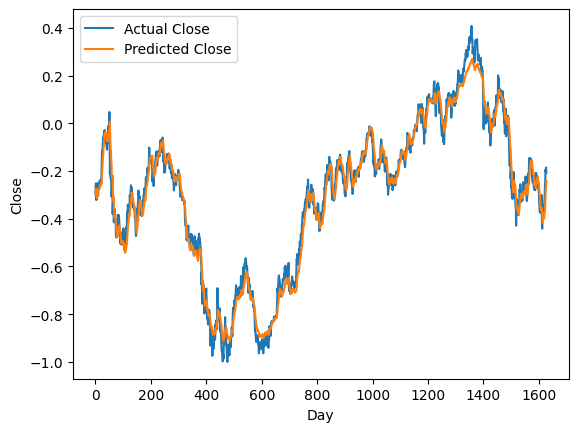

In [30]:
# havent un-normalize
with torch.no_grad():
    predicted = model(X_train.to(device)).to('cpu').numpy()

plt.plot(y_train, label='Actual Close')
plt.plot(predicted, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [31]:
train_predictions = predicted.flatten()

dummies = np.zeros((X_train.shape[0], num_predict + 1)) # 10 is number of predictor
dummies[:, 0] = train_predictions
dummies = scaler.inverse_transform(dummies)

train_predictions = dummies[:, 0].copy()
train_predictions

array([154.0663649 , 153.0739271 , 154.5321969 , ..., 154.58031791,
       156.02017987, 158.05220256])

In [32]:
dummies = np.zeros((X_train.shape[0], num_predict + 1))
dummies[:, 0] = y_train.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_train = dummies[:, 0].copy()
new_y_train

array([153.13000003, 156.939999  , 157.23000059, ..., 161.64000014,
       163.33000035, 161.4100004 ])

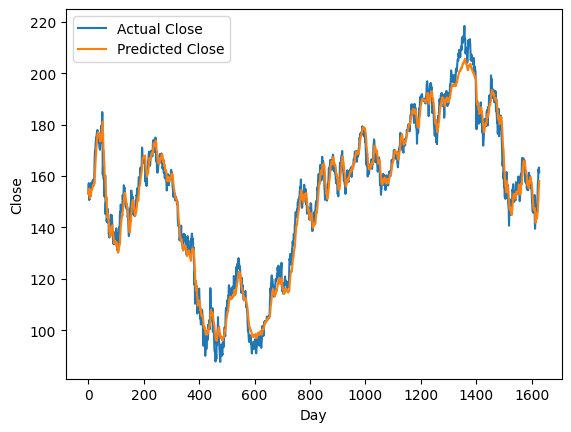

In [33]:
# un-normalized
plt.plot(new_y_train, label='Actual Close')
plt.plot(train_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
plt.show()

In [34]:
test_predictions = model(X_test.to(device)).detach().cpu().numpy().flatten()

dummies = np.zeros((X_test.shape[0], num_predict + 1))
dummies[:, 0] = test_predictions
dummies = scaler.inverse_transform(dummies)

test_predictions = dummies[:, 0].copy()
test_predictions

array([158.31963775, 160.0473155 , 159.71418152, 160.73780999,
       160.63036223, 161.33544078, 161.43129268, 161.40318704,
       160.78198825, 160.08935222, 159.08661068, 158.92815608,
       158.64619218, 159.93979027, 160.3927758 , 161.76447647,
       161.27637688, 162.39927432, 162.35817556, 163.60277832,
       164.17117183, 164.97029552, 165.29426571, 166.14344997,
       166.25964651, 166.44115448, 166.48668434, 166.40515087,
       166.73567157, 167.09893376, 167.81310831, 168.63193058,
       168.78862546, 169.01761945, 169.4159293 , 169.70636945,
       170.56635134, 170.38626414, 170.73871349, 170.10029937,
       169.87517482, 168.88436946, 169.36025618, 168.25699921,
       168.23932597, 168.44010504, 168.03397193, 168.20271781,
       166.12557199, 165.21569277, 165.40187671, 163.95961036,
       163.27978207, 162.70358052, 163.03789041, 163.89794839,
       165.30995927, 165.80319966, 167.51624908, 168.47147555,
       168.1195104 , 168.63388812, 169.36360545, 169.45

In [35]:
dummies = np.zeros((X_test.shape[0], num_predict + 1))
dummies[:, 0] = y_test.flatten()
dummies = scaler.inverse_transform(dummies)

new_y_test = dummies[:, 0].copy()
new_y_test

array([161.77000048, 160.04999935, 160.40999942, 160.51000021,
       161.1600005 , 160.98999985, 160.53000037, 158.81000062,
       158.18000049, 156.06000035, 158.34000037, 158.05000015,
       162.09000024, 162.83000055, 163.44000053, 162.18999965,
       163.85999969, 163.24999972, 165.5499999 , 165.65000069,
       165.66999946, 166.06000047, 166.22999973, 166.26000066,
       166.08000062, 165.3       , 165.90000059, 165.97000045,
       166.87000064, 169.37000032, 169.46000034, 168.50999976,
       169.18000021, 169.33000001, 169.66999993, 171.65999973,
       168.57000023, 171.05999984, 166.99999959, 166.15999987,
       168.07999982, 165.99999999, 166.20999958, 166.47000025,
       167.03000052, 168.01999934, 165.12999935, 161.48000026,
       162.88999964, 163.44999991, 158.95000034, 161.27000068,
       161.07000049, 162.27000028, 166.40000039, 167.15000008,
       169.82999981, 171.03999968, 169.03999979, 169.29999977,
       167.42000014, 170.51999972, 169.00000017, 172.62

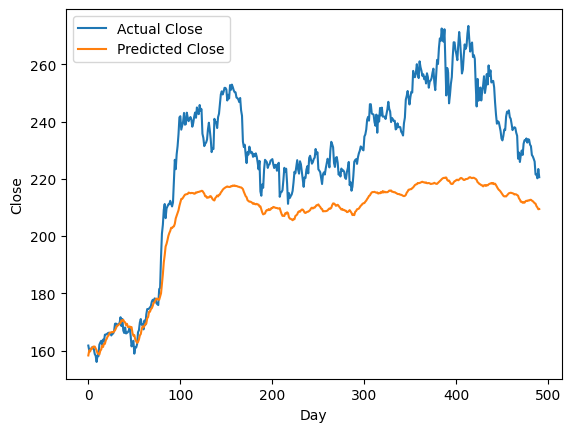

In [36]:
plt.plot(new_y_test, label='Actual Close')
plt.plot(test_predictions, label='Predicted Close')
plt.xlabel('Day')
plt.ylabel('Close')
plt.legend()
'''
plt.twinx()  # Create a new Axes instance sharing the same x-axis
plt.plot(range(519), onestock['RSI'][-519:], color='red', label='RSI')
plt.ylabel('RSI')
plt.legend(loc='upper right')
'''
plt.show()

In [37]:
np.mean(np.abs(new_y_test - test_predictions) / np.abs(test_predictions))

0.09741125585422529

In [38]:
LSTM_ret = pd.DataFrame()
LSTM_ret['actual'] = new_y_test
LSTM_ret['predicted'] = test_predictions
LSTM_ret['return'] = np.log(LSTM_ret['actual'] / LSTM_ret['actual'].shift(1))
LSTM_ret['pos'] = np.where(LSTM_ret['predicted'] > LSTM_ret['actual'].shift(1), 1, -1)
LSTM_ret['lag'] = LSTM_ret['actual'].shift(1)
LSTM_ret['lag pos'] = np.where(LSTM_ret['lag'] < LSTM_ret['actual'], 1, -1)
LSTM_ret

,actual,predicted,return,pos,lag,lag pos
0,161.770000,158.319638,NaN,-1,NaN,-1
1,160.049999,160.047316,-0.010689,-1,161.770000,-1
2,160.409999,159.714182,0.002247,-1,160.049999,1
3,160.510000,160.737810,0.000623,1,160.409999,1
4,161.160001,160.630362,0.004041,1,160.510000,1
...,...,...,...,...,...,...
486,221.540000,211.307641,-0.020020,-1,226.019999,-1
487,221.580000,210.460934,0.000181,-1,221.540000,1
488,220.180000,210.020263,-0.006338,-1,221.580000,-1
489,223.420001,209.372254,0.014608,-1,220.180000,1


In [39]:
LSTM_ret['actual'].shift(1)

0             NaN
1      161.770000
2      160.049999
3      160.409999
4      160.510000
          ...    
486    226.019999
487    221.540000
488    221.580000
489    220.180000
490    223.420001
Name: actual, Length: 491, dtype: float64

<Axes: >

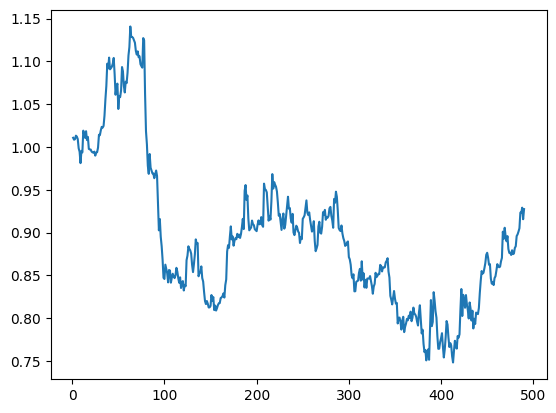

In [40]:
(LSTM_ret['return'] * LSTM_ret['pos']).cumsum().apply(np.exp).plot()

<Axes: >

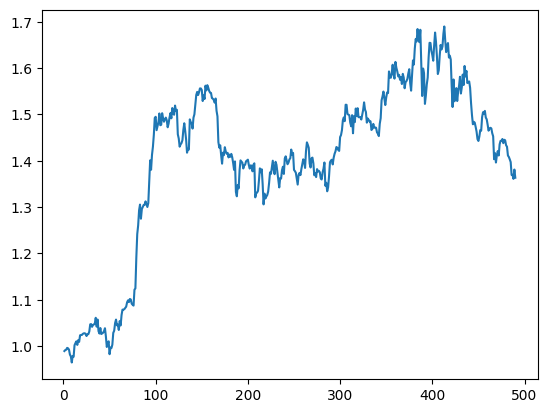

In [41]:
LSTM_ret['return'].cumsum().apply(np.exp).plot()

In [42]:
(LSTM_ret['return'] * LSTM_ret['pos']).cumsum().apply(np.exp)

0           NaN
1      1.010747
2      1.008478
3      1.009107
4      1.013193
         ...   
486    0.923381
487    0.923214
488    0.929084
489    0.915611
490    0.927441
Length: 491, dtype: float64

In [43]:
LSTM_ret['return'].cumsum().apply(np.exp)

0           NaN
1      0.989368
2      0.991593
3      0.992211
4      0.996229
         ...   
486    1.369475
487    1.369722
488    1.361068
489    1.381097
490    1.363479
Name: return, Length: 491, dtype: float64

In [44]:
# strategy 2
LSTM_ret = pd.DataFrame()
LSTM_ret['actual'] = new_y_test
LSTM_ret['predicted'] = test_predictions
LSTM_ret['ysd predict'] = LSTM_ret['predicted'].shift(1)
LSTM_ret['return'] = np.log(LSTM_ret['actual'] / LSTM_ret['actual'].shift(1))
LSTM_ret['pos'] = np.where(LSTM_ret['predicted'] > LSTM_ret['ysd predict'], 1, -1)
LSTM_ret['lag'] = LSTM_ret['actual'].shift(1)
LSTM_ret

,actual,predicted,ysd predict,return,pos,lag
0,161.770000,158.319638,NaN,NaN,-1,NaN
1,160.049999,160.047316,158.319638,-0.010689,1,161.770000
2,160.409999,159.714182,160.047316,0.002247,-1,160.049999
3,160.510000,160.737810,159.714182,0.000623,1,160.409999
4,161.160001,160.630362,160.737810,0.004041,-1,160.510000
...,...,...,...,...,...,...
486,221.540000,211.307641,211.504209,-0.020020,-1,226.019999
487,221.580000,210.460934,211.307641,0.000181,-1,221.540000
488,220.180000,210.020263,210.460934,-0.006338,-1,221.580000
489,223.420001,209.372254,210.020263,0.014608,-1,220.180000


<Axes: >

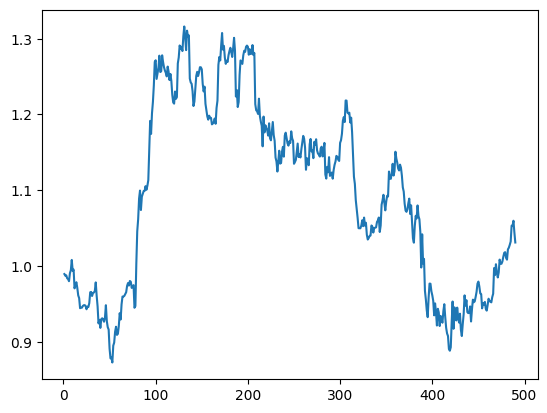

In [45]:
(LSTM_ret['return'] * LSTM_ret['pos']).cumsum().apply(np.exp).plot()

In [46]:
(LSTM_ret['return'] * LSTM_ret['pos']).cumsum().apply(np.exp)

0           NaN
1      0.989368
2      0.987147
3      0.987763
4      0.983779
         ...   
486    1.053210
487    1.053020
488    1.059715
489    1.044348
490    1.031026
Length: 491, dtype: float64